# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata,study_results, on='Mouse ID')

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Checking the number of mice.
len(df['Mouse ID'].unique())

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df[['Mouse ID','Timepoint']].value_counts().to_frame()
duplicate_mice.loc[duplicate_mice['count'] > 1,:]

count
Mouse ID Timepoint       
g989     20             2
         15             2
         10             2
         5              2
         0              2

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
df.loc[df['Mouse ID'] == 'g989', :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = df.drop([908,909,910,911,912,913,914,915,916,917,918,919,920])
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = (cleaned_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).mean())['Tumor Volume (mm3)'].tolist()
med_tumor_volume = cleaned_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'].tolist()
var_tumor_volume = cleaned_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'].tolist()
sd_tumor_volume = cleaned_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'].tolist()
sem_tumor_volume = cleaned_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'].tolist()


summary_stats = pd.DataFrame({'Drug Regimen': df['Drug Regimen'].sort_values().unique(),
                           'Mean Tumor Volume': mean_tumor_volume,
                           'Median Tumor Volume': med_tumor_volume,
                           'Tumor Volume Variance': var_tumor_volume,
                           'Tumor Volume Std. Dev.': sd_tumor_volume,
                           'Tumor Volume Std. Err': sem_tumor_volume}).set_index('Drug Regimen')
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
cleaned_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Bar and Pie Charts

In [11]:
num_drug_regimen = cleaned_df['Drug Regimen'].value_counts()
num_drug_regimen

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

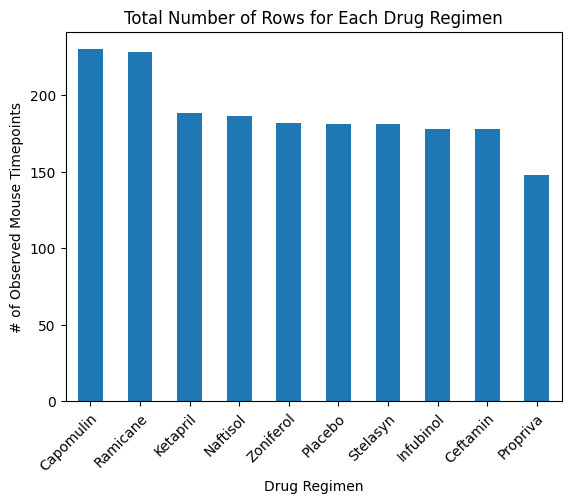

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
figure1 = num_drug_regimen.plot(kind='bar',
                                  title='Total Number of Rows for Each Drug Regimen',
                                  xlabel='Drug Regimen',
                                  ylabel='# of Observed Mouse Timepoints')
xticklabels = num_drug_regimen.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode='anchor',ha='right',wrap=True)
plt.show()

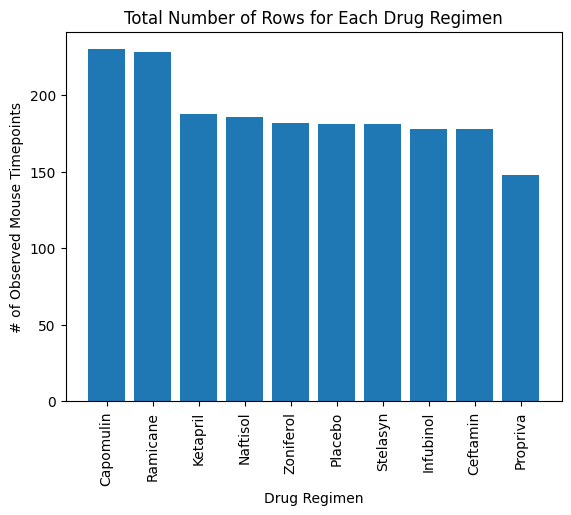

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis1 = np.arange(len(num_drug_regimen))
tick_locations = [value for value in x_axis1]
plt.bar(x_axis1, num_drug_regimen.tolist(), align='center')
plt.xticks(tick_locations, num_drug_regimen.index, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.show()

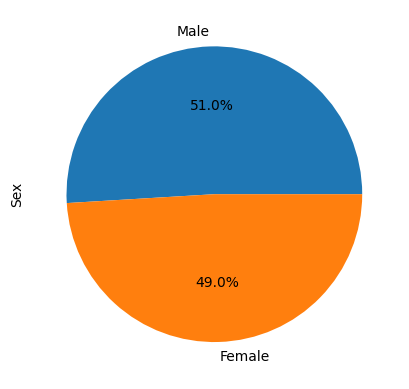

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = cleaned_df['Sex'].value_counts()
sex_pie_pandas = sex.plot(kind='pie',autopct='%1.1f%%')
sex_pie_pandas.set_ylabel('Sex')
plt.show()

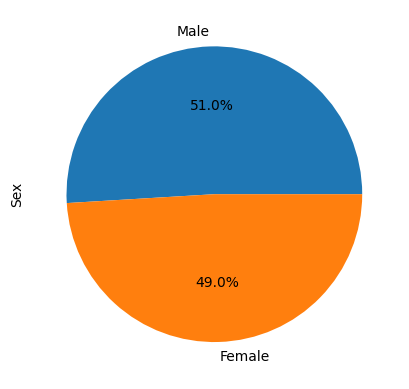

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex,labels=['Male','Female'],autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show();

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

best_drugs = cleaned_df.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumors = pd.merge(cleaned_df,best_drugs,on='Mouse ID')
last_timepoint = final_tumors.loc[final_tumors['Timepoint_x']==final_tumors['Timepoint_y']]
last_timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1846,z314,Stelasyn,Female,21,28,5,45.934712,0,5
1849,z435,Propriva,Female,12,26,10,48.710661,0,10
1859,z581,Infubinol,Female,24,25,45,62.754451,3,45
1869,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']



# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

for drug in treatments:
    tumors = last_timepoint.loc[last_timepoint['Drug Regimen'] == drug][['Drug Regimen', 'Tumor Volume (mm3)']]
    just_vol = tumors['Tumor Volume (mm3)']
    tumor_volume.append(just_vol)
   

    quartiles = tumors['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tumors['Tumor Volume (mm3)'].loc[
        (tumors['Tumor Volume (mm3)']<lower_bound)|(
            tumors['Tumor Volume (mm3)']>upper_bound)]
     

    print(f'{drug} outliers: {outliers}')
   




Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


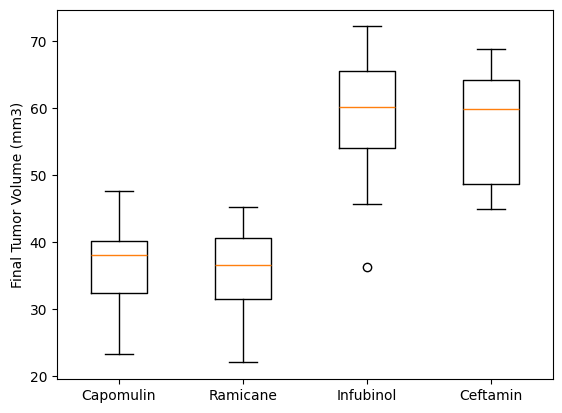

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax1= plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume)
ax1.set_xticklabels(treatments)
plt.show()


## Line and Scatter Plots

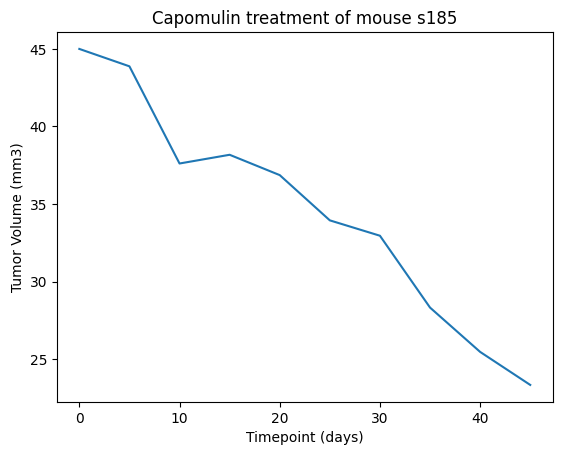

In [312]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_graph = cleaned_df[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
single_mouse = line_graph.loc[line_graph['Mouse ID']=='s185']
x_axis = single_mouse['Timepoint']
y_axis = single_mouse['Tumor Volume (mm3)']
plt.plot(x_axis,y_axis)
plt.title("Capomulin treatment of mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

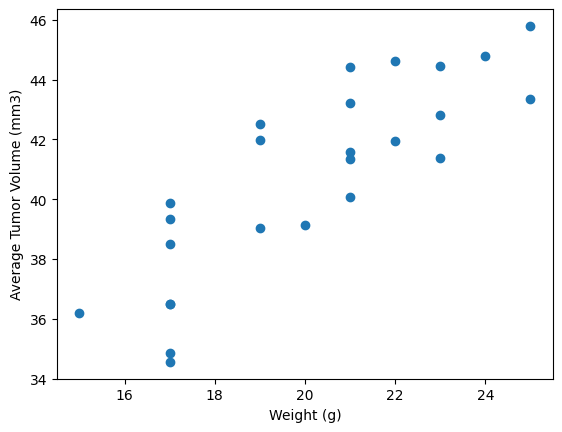

In [346]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_v_tumor = cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin'][['Mouse ID','Weight (g)','Tumor Volume (mm3)']].groupby('Mouse ID').mean()
plt.scatter(weight_v_tumor['Weight (g)'],weight_v_tumor['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is {0.84}


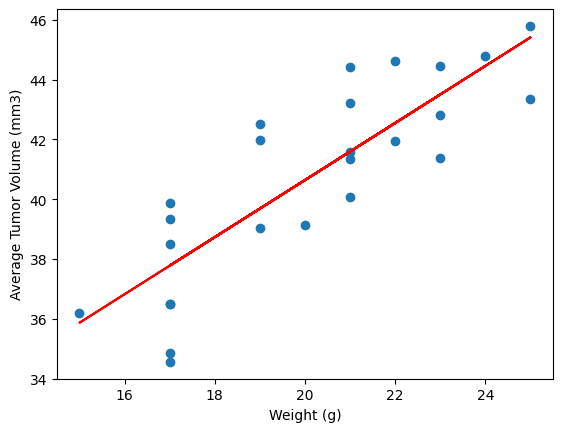

In [365]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = weight_v_tumor['Weight (g)']
tumor_vol = weight_v_tumor['Tumor Volume (mm3)']
pearsons_r = {round(st.pearsonr(mouse_weight,tumor_vol)[0],2)}

print(f"The correlation between mouse weight and the average tumor volume is {pearsons_r}") 

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_vol)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight,tumor_vol)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()